In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
keras = tf.keras

from clean_text import clean_data

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import sequence

Using TensorFlow backend.


In [2]:
def plot_metric(model):
    plt.plot(model.history.history["accuracy"], label="accuracy")
    plt.plot(model.history.history["val_accuracy"],label="validation accuracy")
    plt.legend()
    plt.show()
    
    plt.plot(model.history.history["loss"], label="loss")
    plt.plot(model.history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv("train.csv", encoding="latin")

In [4]:
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [5]:
df.dropna(inplace=True)

In [6]:
df["clean_tweet"] = df.tweet.map(clean_data)

In [7]:
df.head()

,tweet_id,tweet,sentiment,clean_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,defining language of touch with different dial...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodles all doodles should ...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex of stealing th...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,this iphone app would b pretty awesome if it d...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside the apple store in austin waiting...


In [8]:
X = df.clean_tweet
y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=0)

In [9]:
num_words = 1000
oov = "<oov>"
max_len = 100
padding = "post"
trunc = "post"
embedding = 32

In [10]:
tokenizor = Tokenizer(num_words=num_words, oov_token=oov)

In [11]:
tokenizor.fit_on_texts(X_train)
X_train_seq = tokenizor.texts_to_sequences(X_train)
X_train_pad = sequence.pad_sequences(X_train_seq, maxlen=max_len, padding=padding, truncating=trunc)

X_test_seq = tokenizor.texts_to_sequences(X_test)
X_test_pad = sequence.pad_sequences(X_test_seq, maxlen=max_len, padding=padding, truncating=trunc)

In [12]:
# model

model = keras.Sequential([
    keras.layers.Embedding(num_words, embedding, input_length=max_len),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(6),
    keras.layers.Dense(1)
])

early_stop = keras.callbacks.EarlyStopping(patience=10)

model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(X_train_pad, y_train, epochs=20, callbacks=early_stop, validation_data=(X_test_pad, y_test))

Epoch 1/20
160/160 [==============================] - 1s 5ms/step - loss: 0.5558 - accuracy: 0.2988 - val_loss: -4.5217 - val_accuracy: 0.5917
Epoch 2/20
160/160 [==============================] - 1s 4ms/step - loss: -4.5799 - accuracy: 0.5930 - val_loss: -4.5217 - val_accuracy: 0.5917
Epoch 3/20
160/160 [==============================] - 1s 3ms/step - loss: -4.5799 - accuracy: 0.5930 - val_loss: -4.5217 - val_accuracy: 0.5917
Epoch 4/20
160/160 [==============================] - 1s 4ms/step - loss: -4.5799 - accuracy: 0.5930 - val_loss: -4.5217 - val_accuracy: 0.5917
Epoch 5/20
160/160 [==============================] - 1s 3ms/step - loss: -4.5799 - accuracy: 0.5930 - val_loss: -4.5217 - val_accuracy: 0.5917
Epoch 6/20
160/160 [==============================] - 1s 4ms/step - loss: -4.5799 - accuracy: 0.5930 - val_loss: -4.5217 - val_accuracy: 0.5917
Epoch 7/20
160/160 [==============================] - 1s 4ms/step - loss: -4.5799 - accuracy: 0.5930 - val_loss: -4.5217 - val_accuracy: 

In [13]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

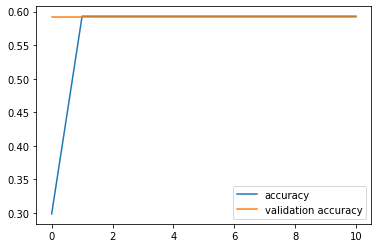

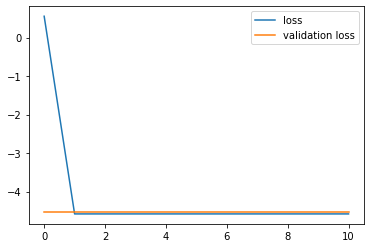

In [14]:
plot_metric(model)

In [15]:
## lstm model

lstm_model = keras.Sequential([
    keras.layers.Embedding(num_words,embedding,input_length=max_len),    
    keras.layers.LSTM(6),
    keras.layers.Dense(6, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(1, activation="sigmoid")
])


lstm_model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(patience=10)
lstm_model.fit(X_train_pad, y_train, epochs=20, validation_data=(X_test_pad, y_test), callbacks=early_stop)

Epoch 1/20
160/160 [==============================] - 9s 59ms/step - loss: 1.5501e-07 - accuracy: 0.0627 - val_loss: 1.5456e-07 - val_accuracy: 0.0628
Epoch 2/20
160/160 [==============================] - 8s 48ms/step - loss: 1.5501e-07 - accuracy: 0.0627 - val_loss: 1.5456e-07 - val_accuracy: 0.0628
Epoch 3/20
160/160 [==============================] - 8s 48ms/step - loss: 1.5501e-07 - accuracy: 0.0627 - val_loss: 1.5456e-07 - val_accuracy: 0.0628
Epoch 4/20
160/160 [==============================] - 9s 55ms/step - loss: 1.5501e-07 - accuracy: 0.0627 - val_loss: 1.5456e-07 - val_accuracy: 0.0628
Epoch 5/20
160/160 [==============================] - 9s 57ms/step - loss: 1.5501e-07 - accuracy: 0.0627 - val_loss: 1.5456e-07 - val_accuracy: 0.0628
Epoch 6/20
160/160 [==============================] - 10s 60ms/step - loss: 1.5501e-07 - accuracy: 0.0627 - val_loss: 1.5456e-07 - val_accuracy: 0.0628
Epoch 7/20
160/160 [==============================] - 9s 58ms/step - loss: 1.5501e-07 - accur

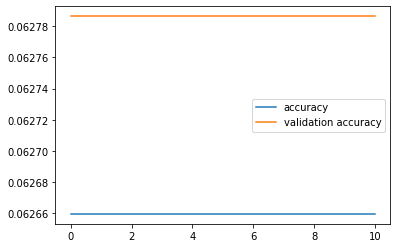

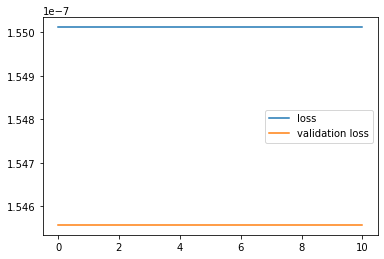

In [16]:
plot_metric(lstm_model)

In [17]:
## Bidirection_lstm

bi_lstm = keras.Sequential([
    keras.layers.Embedding(num_words,embedding, input_length=max_len),
    keras.layers.Bidirectional(keras.layers.LSTM(6)),
    keras.layers.Dense(6),
    keras.layers.Dense(1, activation="sigmoid")
])


bi_lstm.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

bi_lstm.fit(X_train_pad, y_train, epochs=20, validation_data=(X_test_pad, y_test), callbacks=early_stop)

Epoch 1/20
160/160 [==============================] - 13s 79ms/step - loss: -1.0498 - accuracy: 0.5887 - val_loss: -3.0088 - val_accuracy: 0.5917
Epoch 2/20
160/160 [==============================] - 11s 66ms/step - loss: -5.8723 - accuracy: 0.5930 - val_loss: -9.0441 - val_accuracy: 0.5917
Epoch 3/20
160/160 [==============================] - 10s 65ms/step - loss: -13.1579 - accuracy: 0.5930 - val_loss: -17.3753 - val_accuracy: 0.5917
Epoch 4/20
160/160 [==============================] - 11s 68ms/step - loss: -22.8027 - accuracy: 0.5930 - val_loss: -28.0398 - val_accuracy: 0.5917
Epoch 5/20
160/160 [==============================] - 11s 68ms/step - loss: -34.7102 - accuracy: 0.5930 - val_loss: -40.8866 - val_accuracy: 0.5917
Epoch 6/20
160/160 [==============================] - 10s 62ms/step - loss: -48.9127 - accuracy: 0.5930 - val_loss: -55.8389 - val_accuracy: 0.5917
Epoch 7/20
160/160 [==============================] - 10s 61ms/step - loss: -65.4797 - accuracy: 0.5930 - val_loss: 

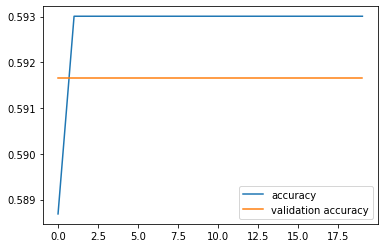

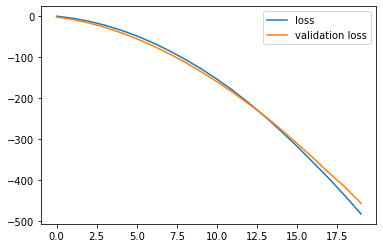

In [18]:
plot_metric(bi_lstm)